<a href="https://www.kaggle.com/code/kiranpatil7022/employee-salary-insights-and-predictions?scriptVersionId=151104572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **1. Loading libraries and data**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-robotics-employee-salary/train_dataset.csv
/kaggle/input/ai-robotics-employee-salary/test_dataset.csv
/kaggle/input/ai-robotics-employee-salary/train_salaries.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from scipy import stats

In [3]:
# load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv("/kaggle/input/ai-robotics-employee-salary/train_dataset.csv")
train_data_salaries = pd.read_csv("/kaggle/input/ai-robotics-employee-salary/train_salaries.csv")
#test_data
df_test = pd.read_csv("/kaggle/input/ai-robotics-employee-salary/test_dataset.csv")

In [4]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
df_test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
# merging train_data and train_data_salaries datasets
df = pd.merge(train_data,train_data_salaries,on="jobId")
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


# **2. Exploratory Data Analysis**

In [8]:
df.info()
# no non-null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [9]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [10]:
df[df["salary"]==0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [11]:
df[df["salary"]<50]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81,47
16,JOB1362684407703,COMP14,JUNIOR,MASTERS,PHYSICS,SERVICE,1,91,47
20,JOB1362684407707,COMP44,JANITOR,NONE,NONE,SERVICE,11,96,32
119,JOB1362684407806,COMP15,JANITOR,HIGH_SCHOOL,NONE,WEB,6,60,49
...,...,...,...,...,...,...,...,...,...
999860,JOB1362685407547,COMP61,JANITOR,NONE,NONE,EDUCATION,2,37,45
999881,JOB1362685407568,COMP16,JANITOR,HIGH_SCHOOL,NONE,HEALTH,2,61,46
999898,JOB1362685407585,COMP13,JANITOR,HIGH_SCHOOL,NONE,WEB,7,99,41
999901,JOB1362685407588,COMP27,JANITOR,HIGH_SCHOOL,NONE,SERVICE,4,46,35


In [12]:
df[df["jobType"]=="JANITOR"].describe()

,yearsExperience,milesFromMetropolis,salary
count,124971.000000,124971.000000,124971.000000
mean,11.969657,49.443815,70.813045
std,7.211544,28.842493,24.643021
min,0.000000,0.000000,17.000000
25%,6.000000,24.000000,52.000000
50%,12.000000,50.000000,68.000000
75%,18.000000,74.000000,86.000000
max,24.000000,99.000000,189.000000


In [13]:
df[df['salary']<31]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
461,JOB1362684408148,COMP14,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,73,23
873,JOB1362684408560,COMP35,JANITOR,NONE,NONE,AUTO,1,84,29
1195,JOB1362684408882,COMP1,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,2,59,28
1397,JOB1362684409084,COMP53,JANITOR,NONE,NONE,EDUCATION,6,90,28
2003,JOB1362684409690,COMP9,JANITOR,NONE,NONE,EDUCATION,1,82,24
...,...,...,...,...,...,...,...,...,...
998124,JOB1362685405811,COMP31,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,74,25
999502,JOB1362685407189,COMP29,JANITOR,NONE,NONE,EDUCATION,2,67,30
999706,JOB1362685407393,COMP28,JANITOR,NONE,NONE,SERVICE,1,86,28
999754,JOB1362685407441,COMP23,JANITOR,HIGH_SCHOOL,NONE,SERVICE,4,81,26


In [14]:
# salaries less then 30 can be removed considering for my target having done a degree its the minimum salary.
df = df[df['salary']>30]
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [15]:
df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [18]:
# since jobid are unique id which do not have any relation with th salary 
# we'll be dropping the jobid
df = df.drop(['jobId'],axis=1)
df = df.drop(['companyId'],axis=1)
df
# we can drop the company_id as well but lets check the correlation metrics to confirm

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [19]:
df_test = df_test.drop(['jobId'],axis=1)
df_test = df_test.drop(['companyId'],axis=1)
df_test

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [20]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [21]:
df_test.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [22]:
print("train data length: ",len(df))
print("test data length: ",len(df_test))

train data length:  997548
test data length:  1000000


In [23]:
# get unique values in train data set
print("unique values in train dataset\n")
for x in df.columns:
    print(x,":",len(df[x].unique()))

unique values in train dataset

jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [24]:
# get unique values in test data set
print("unique values in test dataset\n")
for x in df_test.columns:
    print(x,":",len(df_test[x].unique()))

unique values in test dataset

jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


By observing the df.info() and df_test.info(), we can see that dataset has more categorical columns then numerical values.                     
 1. jobType             
 2. degree               
 3. major                
 4. industry 

In [25]:
# creating empty list to store categorical column names and numerical column names respectively.
categorical_columns = []
num_list = []
# looping on whole data set to get the column names.
for x in df:
    if df[x].dtype == 'object':
        categorical_columns.append(x)
    else:
        num_list.append(x)
        
print(categorical_columns);
print(num_list);

['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


In [26]:
df_cat = df[categorical_columns]

# Get the unique values from each column
unique_values = []
for col in df_cat.columns:
    unique_values.append(df_cat[col].unique())

# Print the unique values
print(unique_values)

[array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object), array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object), array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object), array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)]


In [27]:
# we can see there are 'NONE' in 'degree' and 'major'.
print("df shape", df.shape)
deg_none = df[df['degree']=='NONE']
maj_none = df[df['major']=='NONE']
both_none = df[(df['degree'] == 'NONE') & (df['major'] == 'NONE')]
print("both are NONE", both_none.shape)
print("degree is NONE", deg_none.shape)
print("major is NONE", maj_none.shape)

df shape (997548, 7)
both are NONE (235612, 7)
degree is NONE (235612, 7)
major is NONE (529906, 7)


In [28]:
# we have few degree but no major
# only major NONE
only_major = df[(df['major']=='NONE') & (df['degree']!='NONE')]
only_major

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
8,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
10,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102
24,CEO,BACHELORS,NONE,WEB,12,8,202
28,JANITOR,HIGH_SCHOOL,NONE,FINANCE,20,23,101
...,...,...,...,...,...,...,...
999990,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,17,23,89
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobType              997548 non-null  object
 1   degree               997548 non-null  object
 2   major                997548 non-null  object
 3   industry             997548 non-null  object
 4   yearsExperience      997548 non-null  int64 
 5   milesFromMetropolis  997548 non-null  int64 
 6   salary               997548 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 60.9+ MB


In [30]:
corr = df[num_list].corr()
corr.style.background_gradient(cmap='coolwarm')

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.003642,0.370974
milesFromMetropolis,0.003642,1.000000,-0.294435
salary,0.370974,-0.294435,1.000000


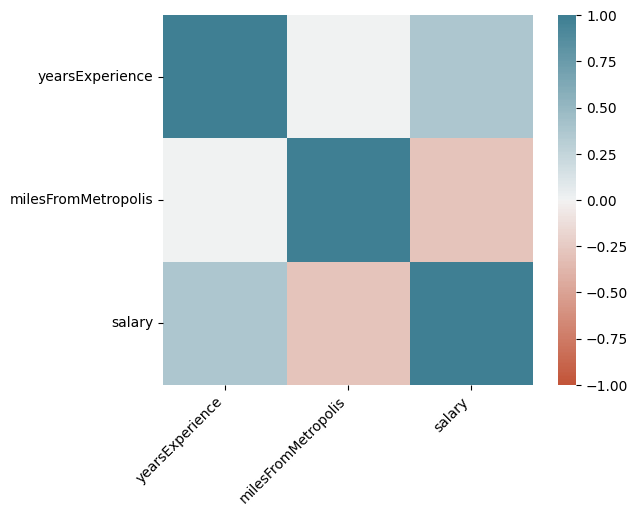

In [31]:
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
    )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );

## 2.1 chi-square test

In [32]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [33]:
def perform_chi_square_test(var_1,var_2):
    #contingency Table
    contingency_table = pd.crosstab(df[var_1], df[var_2])

    #observed Values
    observed_values = contingency_table.values

    #Expected values
    b = chi2_contingency(contingency_table)
    chi_square, p_value, dof, expected = chi2_contingency(contingency_table)
    expected_values = b[3]

    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0]) 
    no_of_columns = len(contingency_table.iloc[0,0:]) 
    degree_f = (no_of_rows-1)*(no_of_columns-1) 
    print("Degree of Freedom:", degree_f)

    #significance Level 5%
    alpha = 0.05
    print("significance level:", alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi_square", chi_square)
    print("chi-square statistic:", chi_square_statistic)

    #critical value
    critical_value = chi2.ppf(q=1-alpha,df=degree_f) 
    print("critical value:",critical_value)
    
    #OR

    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)
    print("p-value:",p_value)
    
    if chi_square_statistic>=critical_value:
        print("Reject H0, There is a relationship between 2 categorical variables")
    else:
        print("Retain H0, There is NO Relationship between 2 categorical variables")
     
    if p_value<=alpha:
        print("Reject H0, There is a relationship between 2 categorical variables")
    else:
        print("Retain H0, There is NO Relationship between 2 categorical variables")
    
    return chi_square, p_value, dof, expected;

In [34]:
relationship_variables = set()
no_relationship_variables = set ()

In [35]:
#looping on categorical data list and using function for performing chi-squared test on columns for the dataset
for x in categorical_columns:
    for i in categorical_columns:
        if i != x:
            print("chi-square test on : ",x," ",i,"\n")
            chi_square, p_value, dof, expected = perform_chi_square_test(x,i)
            print("-----------------------------------------\n")
            # Check if the variables have a relationship
            if p_value <= 0.05:
                relationship_variables.add((x, i))
            else:
                no_relationship_variables.add((x,i))

chi-square test on :  jobType   degree 

Degree of Freedom: 28
significance level: 0.05
chi_square [24583.68086886 24570.18324372 40955.66378188 24563.87912046
 41321.87413036]
chi-square statistic: 49153.86411257831
critical value: 41.33713815142739
p-value: 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
-----------------------------------------

chi-square test on :  jobType   major 

Degree of Freedom: 56
significance level: 0.05
chi_square [ 8183.70637972  8198.20943058  8252.30650448  8188.84205451
  8213.57469626  8230.72970586  8104.4864219  57808.81636745
  8186.17416045]
chi-square statistic: 16381.915810303108
critical value: 74.46832415930936
p-value: 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
-----------------------------------------

chi-square test on :  jobType   industry 

Degree of Free

In [36]:
print("+"*20)
print("\nFeatures having Relationship \n")
for var_1, var_2 in relationship_variables:
    print(var_1, var_2)
print("+"*20)

++++++++++++++++++++

Features having Relationship 

jobType industry
jobType major
jobType degree
major jobType
major degree
degree major
degree jobType
++++++++++++++++++++


The chi-square test showed that there is a relationship between the following pairs of variables:
- jobType degree
- jobType major
- jobType industry
- degree major
- degree jobType
- major degree
- major jobType

This means that these variables are not independent of each other. For example, people who work in the technology industry are more likely to have a major in computer science or statistics. Similarly, people with a degree in marketing are more likely to work in the services industry.

In [37]:
print("+"*20)
print("\nFeatures Not having Relationship \n")
for var_1, var_2 in no_relationship_variables:
    print(var_1, var_2)
print("+"*20)

++++++++++++++++++++

Features Not having Relationship 

industry major
industry degree
industry jobType
major industry
degree industry
++++++++++++++++++++


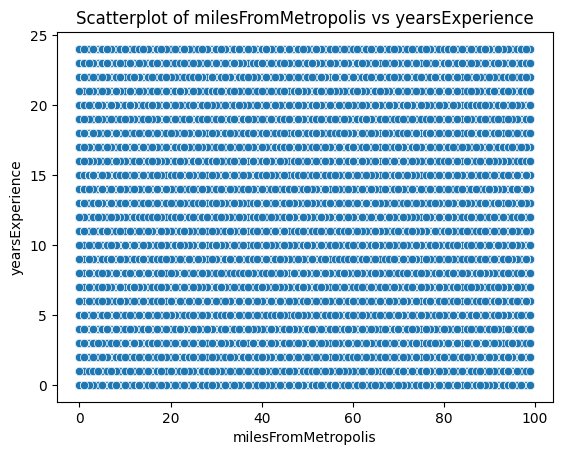

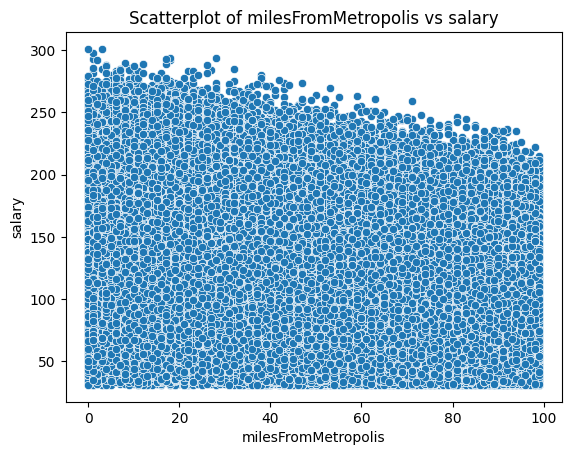

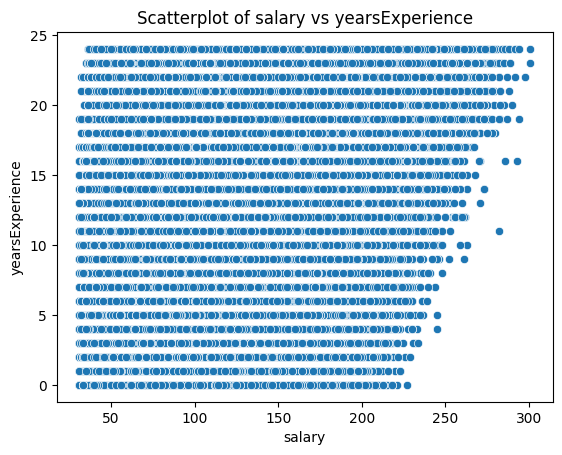

In [38]:
# scatter plot
def plot_scatter(x,y):
    sns.scatterplot(x=i, y=j, data=df)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.title('Scatterplot of {} vs {}'.format(i, j))
    plt.show()
    
for i in num_list:
    for j in num_list:
        if i != j:
            if i < j:
                plot_scatter(i, j)

From above scatter plot

1. Increase in value on years experience axis results in increase of values on salary axis. milesFromMetropolis. **positively correlated**
2. Increase in value on milesFromMetropolis axis results in decrease of values on salary axis. **negatively correlated**
3. There is no change in values of yearExperience vs milesFromMetropolis graph. **no correlation**

array([[<Axes: title={'center': 'yearsExperience'}>,
        <Axes: title={'center': 'milesFromMetropolis'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

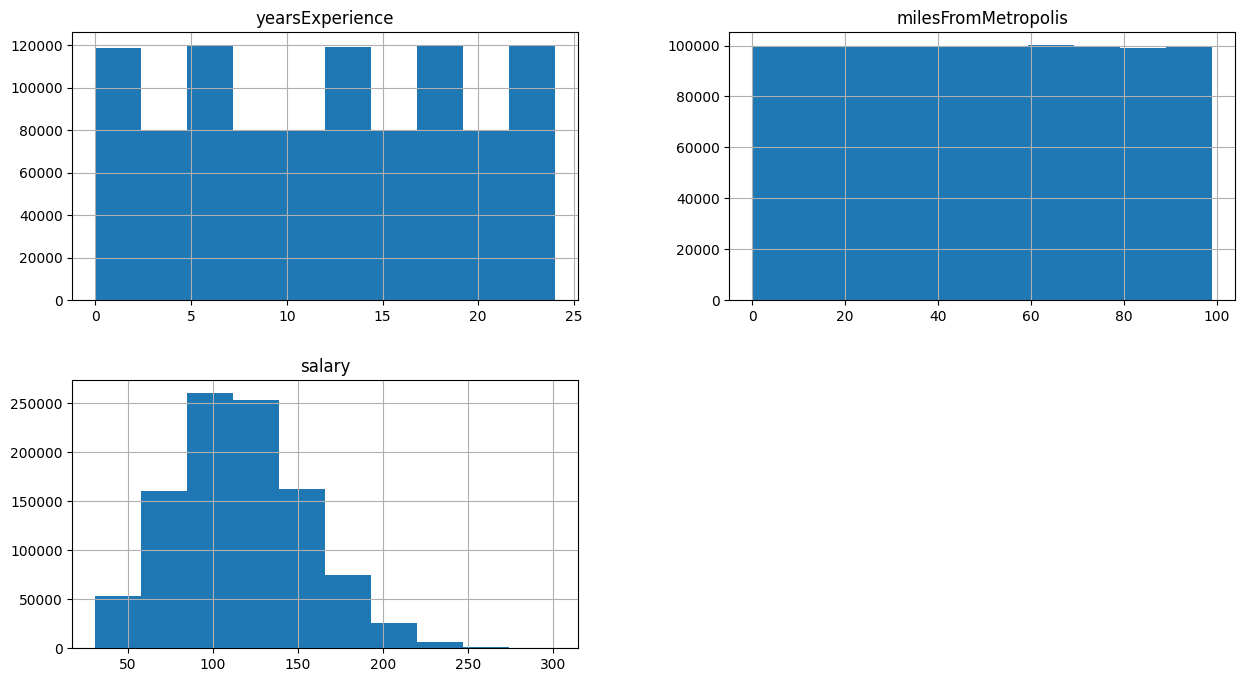

In [39]:
# histogram plots
df.hist(figsize=(15,8))

From the above histogram
1. yearsExperience data distribution is symmetric.
2. milesFromMetropolis data distribution is symmetric.
3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)

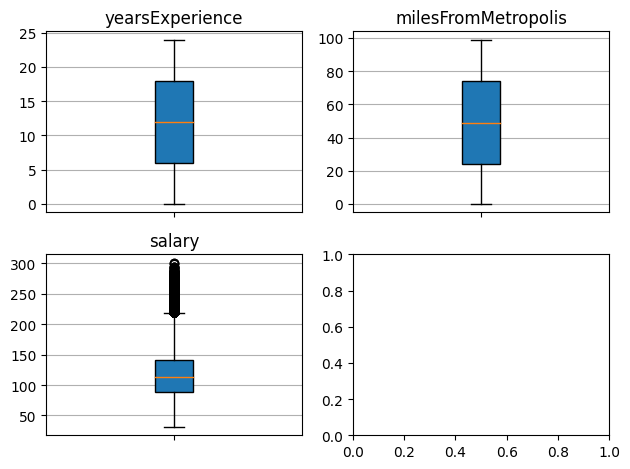

In [40]:
# box plots
fig, axes = plt.subplots(nrows=2,ncols=2) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_list):
    ax = axes[i]
    box = ax.boxplot(df[col], patch_artist=True)
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

From the above bar plot:
1. years of experience  
    - 25% of employee have yearExperience between 0 to 6.
    - 25% of employee have yearExperience between 6 to 12.
    - 25% of employee have yearExperience between 12 to 18.
    - 25% of employee have yearExperience between 18 to 24.  
2. miles from metropolis  
    - 25% of employee from the dataset has value of milesFromMetropolis between range 0 to 24.
    - 25% of employee has value of milesFromMetropolis between 24 to 52.
    - 25% of employee has value of milesFromMetropolis between 52 to 76.
    - 25% of employee has value of milesFromMetropolis between 76 to 100.
3. salary  
    - skewed to the right
    - 25% of employee from the dataset has value of salary between range 0 to 88.
    - 25% of employee has value of salary between 88 to 120.
    - 25% of employee has value of salary between 120 to 150.
    - 25% of employee has value of salary between 150 to 300.
    - mean salary is around 120

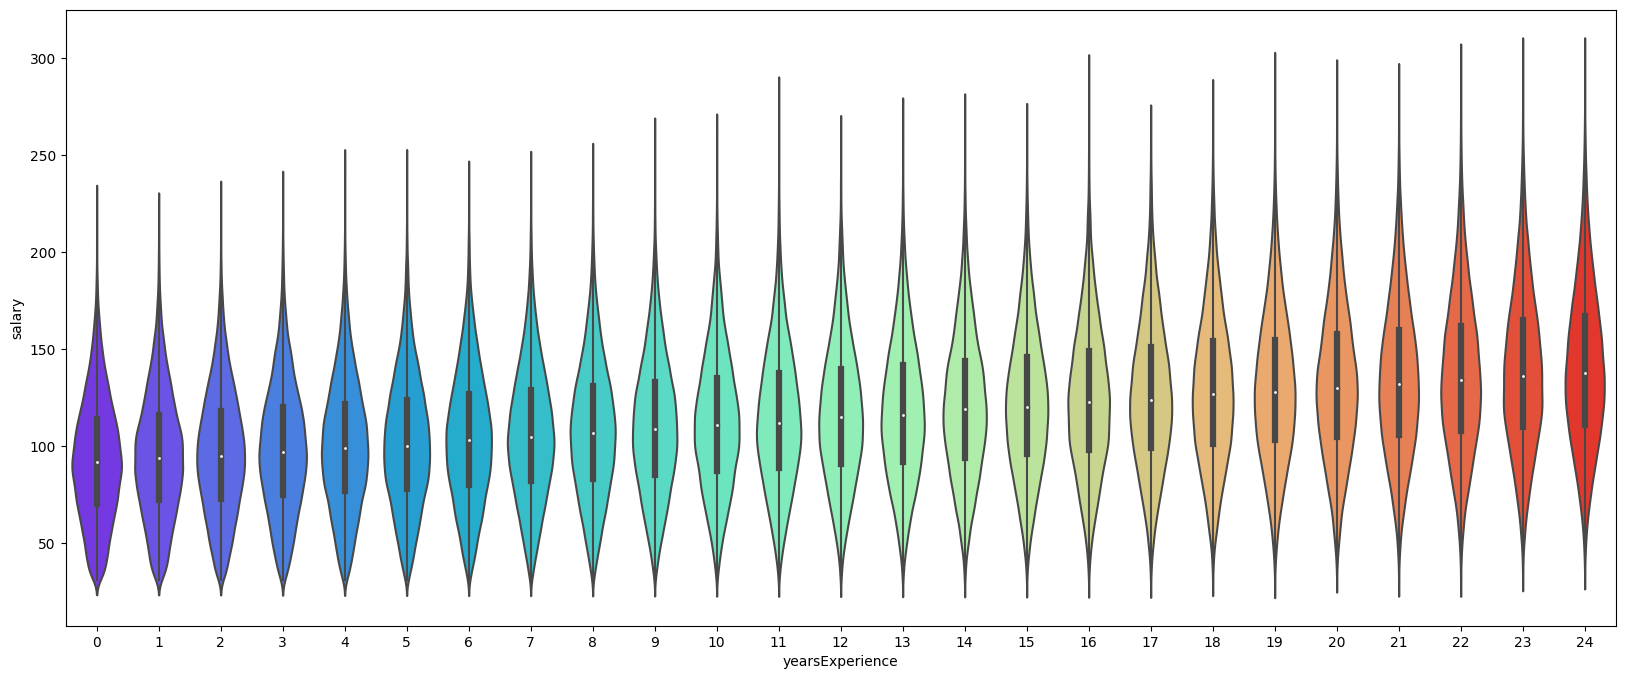

In [41]:
# violin plot years of experience and salary
plt.figure(figsize=(20,8))
sns.violinplot(x='yearsExperience',y='salary',data=df,palette='rainbow')
plt.show()

From the above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. The salary range is increasing as we move right on the axis of year of Experience.


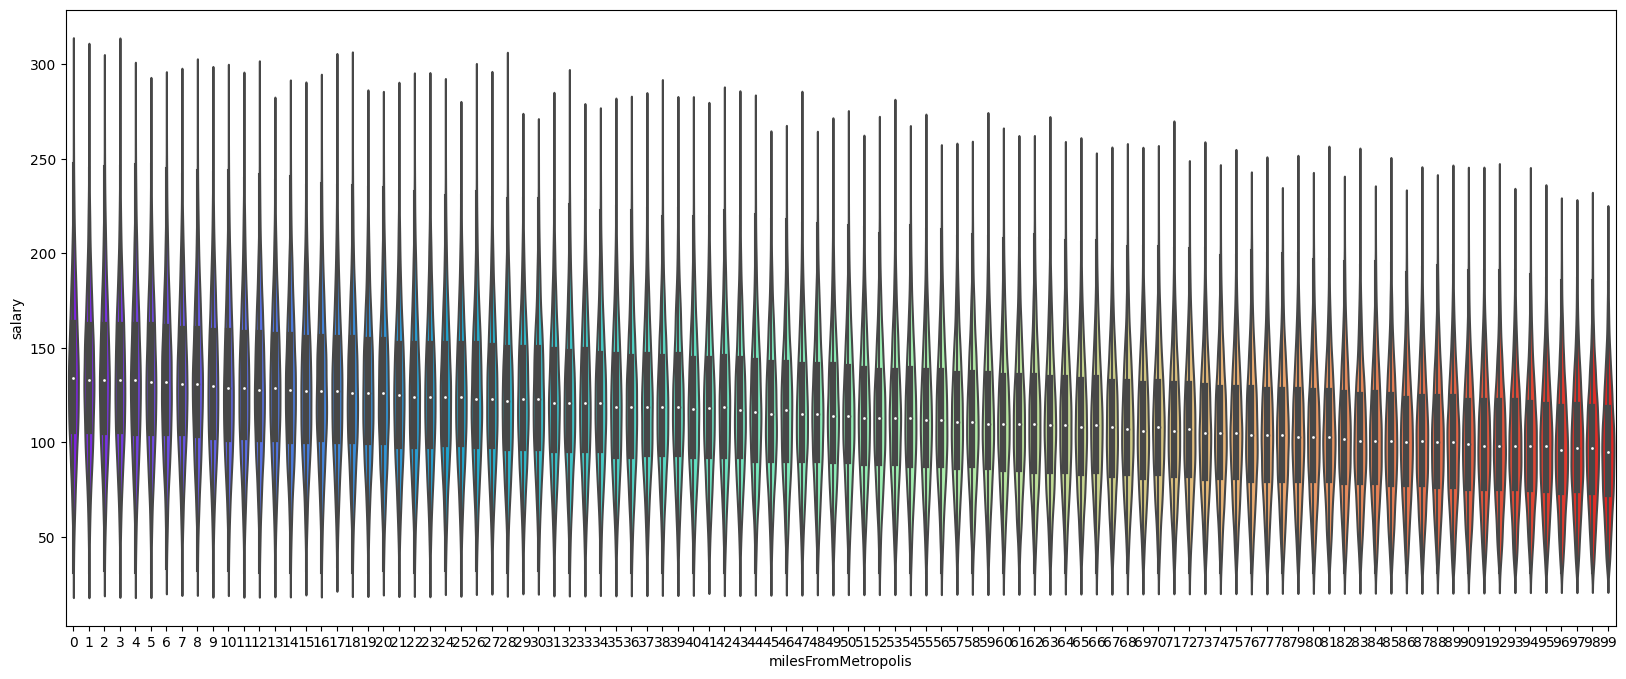

In [42]:
# violin plot milesFromMetropolis and salary
plt.figure(figsize=(20,8))
sns.violinplot(x='milesFromMetropolis',y='salary',data=df,palette='rainbow')
plt.show()

From the above violin plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## 2.2 Varience Inflation Factor

In [43]:
# import statmodle library for vif
import statsmodels.api as sm

In [44]:
vif_df = df.drop(['jobType', 'degree', 'major', 'industry','salary'],axis=1)
vif_target = df['salary']

vif_names = ['yearsExperience', 'milesFromMetropolis']

In [45]:
vif_names

['yearsExperience', 'milesFromMetropolis']

In [46]:
vif_df.columns

Index(['yearsExperience', 'milesFromMetropolis'], dtype='object')

In [47]:
for i in range(0,len(vif_names)):
    y = vif_df.loc[:,vif_df.columns == vif_names[i]]
    x = vif_df.loc[:,vif_df.columns != vif_names[i]]
    model = sm.OLS(y,x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq),2)
    
    print("R-square value of {} column is {} keeping all other columns as features".format(vif_names[i],(round(rsq,2))))
    print("Varience Inflation Factor of {} column is {}".format(vif_names[i],vif))
    print("*"*15)

R-square value of yearsExperience column is 0.55 keeping all other columns as features
Varience Inflation Factor of yearsExperience column is 2.22
***************
R-square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Varience Inflation Factor of milesFromMetropolis column is 2.22
***************


**Observations:**
there is a collinearity/umulticollinearity between variables as the VIF is almost upto 2.5

## 2.3.1 ANOVA

In [48]:
df.columns

Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')

In [49]:
def perform_anova_test(x,y):
    anova_train = df[[x,y]]
    
    # group unique x values with y counts
    groups = anova_train.groupby(x).count().reset_index()
    print(groups)
    
    """
    # show distribution of unique values of x 
    unique_majors = anova_train[x].unique()
    for major in unique_majors:
        plt.figure(figsize=(3,2))
        stats.probplot(anova_train[anova_train[x] == major][y],dist="norm",plot=plt)
        plt.title("Probability Plot - "+str(major))
        plt.show()
   """
    
    # calculate ratio of largest to smallest sample standard deviation
    ratio = anova_train.groupby(x).std().max() / anova_train.groupby(x).std().min()
    print("Ratio : ",ratio)
    
    # create ANOVA backbone table
    # ss- sum of squares source, df= degree of freedom source, ms- mean sum of squares source, F- f-value, P-value, F-critical
    data = [['Between Groups', '', '', '', '', '', ''],['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data,columns=['Source of Variation','SS','df','MS','F','P-value','F-critical'])
    anova_table.set_index('Source of Variation', inplace=True)
    
    # calculate SSTR and update anova table
    x_bar = anova_train[y].mean()
    SSTR = anova_train.groupby(x).count() * (anova_train.groupby(x).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()
    
    # calculate SSE and update anova table
    SSE = (anova_train.groupby(x).count() - 1) * anova_train.groupby(x).std()**2
    anova_table['SS']['Within Groups'] = SSE[y].sum()
    
    # calculate SSTR and update anova table
    SSTRT = SSTR[y].sum() + SSE[y].sum()
    anova_table['SS']['Total'] = SSTRT
    
    # update degree of freedom
    anova_table['df']['Between Groups'] = anova_train[x].nunique() - 1
    anova_table['df']['Within Groups'] = anova_train.shape[0] - anova_train[x].nunique()
    anova_table['df']['Total'] = anova_train.shape[0] - 1
    
    # calculate MS
    anova_table['MS'] = anova_table['SS'] /  anova_table['df']
    
    # calculate F
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F
    
    # p-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
    
    # F critical
    alpha = 0.05
    #possible types "right-tailed, left-tailed, two-tailed"
    tail_hypothesis_type = 'two-tailed'
    if tail_hypothesis_type == 'two-tailed':
        alpha /= 2
    anova_table['F-critical']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
    
    # final ANOVA table
    print(anova_table)
    
    # p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis. *****~~~~~~*****~~~~~~*****~~~~~~*****"
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null hypothesis is Rejected."
    print("F-score is : ",anova_table['F']['Between Groups']," and p-value is : ", anova_table['P-value']['Between Groups'])
    print(conclusion)
    
    # critical value approach
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis. *****~~~~~~*****~~~~~~*****~~~~~~*****"
    if anova_table['F']['Between Groups'] > anova_table['F-critical']['Between Groups']:
        conclusion = "Null hypothesis is Rejected."
    print("F-score is : ",anova_table['F']['Between Groups']," and critical value is : ", anova_table['F-critical']['Between Groups'])
    print(conclusion)

In [50]:
#perform anova test on major and salary
perform_anova_test('major','salary')

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410
Ratio :  salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value F-critical  
Source of Variation                     
Between Groups          0.0   2.191831  
Within Groups                           
Total                                   
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is :  20572.997067846136  and p-

In [51]:
#perform anova test on jobType and salary
perform_anova_test('jobType','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234
Ratio :  salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value F-critical  
Source of Variation                     
Between Groups          0.0    2.28755  
Within Groups                           
Total                                   
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is :  77349.96188255494  and

In [52]:
#perform anova test on degree and salary
perform_anova_test('degree','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612
Ratio :  salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value F-critical  
Source of Variation                     
Between Groups          0.0   2.785834  
Within Groups                           
Total                                   
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is :  47107.26230562572  and p-value is :  1.1102230246251565e-16
Null hypothesis is Rejected.
Approach 2: The critical valu

In [53]:
#perform anova test on yearsExperience and salary
perform_anova_test('yearsExperience','salary')

    yearsExperience  salary
0                 0   39196
1                 1   39771
2                 2   39711
3                 3   39924
4                 4   39853
5                 5   39874
6                 6   39984
7                 7   39968
8                 8   40048
9                 9   40197
10               10   40004
11               11   39926
12               12   39449
13               13   39817
14               14   39823
15               15   40310
16               16   39869
17               17   40069
18               18   40087
19               19   39859
20               20   39988
21               21   39759
22               22   40187
23               23   40015
24               24   39860
Ratio :  salary    1.271743
dtype: float64
                                    SS      df              MS            F  \
Source of Variation                                                           
Between Groups        203684410.516337      24  8486850.438181  6635.05

In [54]:
#perform anova test on jobType and yearsExperience
perform_anova_test('jobType','yearsExperience')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234
Ratio :  yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                    F-critical  
Source of Variation             
Between Groups         2.28755  
Within Groups                   
Total                           
Approach 1: The p-value approach to hypothesis testing in the decision rule
F

In [55]:
#perform anova test on degree and yearsExperience
perform_anova_test('degree','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612
Ratio :  yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                    F-critical  
Source of Variation             
Between Groups        2.785834  
Within Groups                   
Total                           
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is :  3.2150294466062923  and p-value is :  0.011980261991255126
Null hypothesis is Rejected.
Approach 2: The c

In [56]:
#perform anova test on major and yearsExperience
perform_anova_test('major','yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410
Ratio :  yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                    F-critical  
Source of Variation             
Between Groups        2.191831  
Within Groups                   
Total                           
Approach 1: The p-value approach to hypothesis testing in the decision r

In [57]:
#perform anova test on industry and yearsExperience
perform_anova_test('industry','yearsExperience')

    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205
Ratio :  yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                    F-critical  
Source of Variation             
Between Groups        2.408242  
Within Groups                   
Total                           
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is :  5.4341908776699475  and p-value is :  1.2491427772820

## 2.3.2 Dendogram

In [58]:
df.shape

(997548, 7)

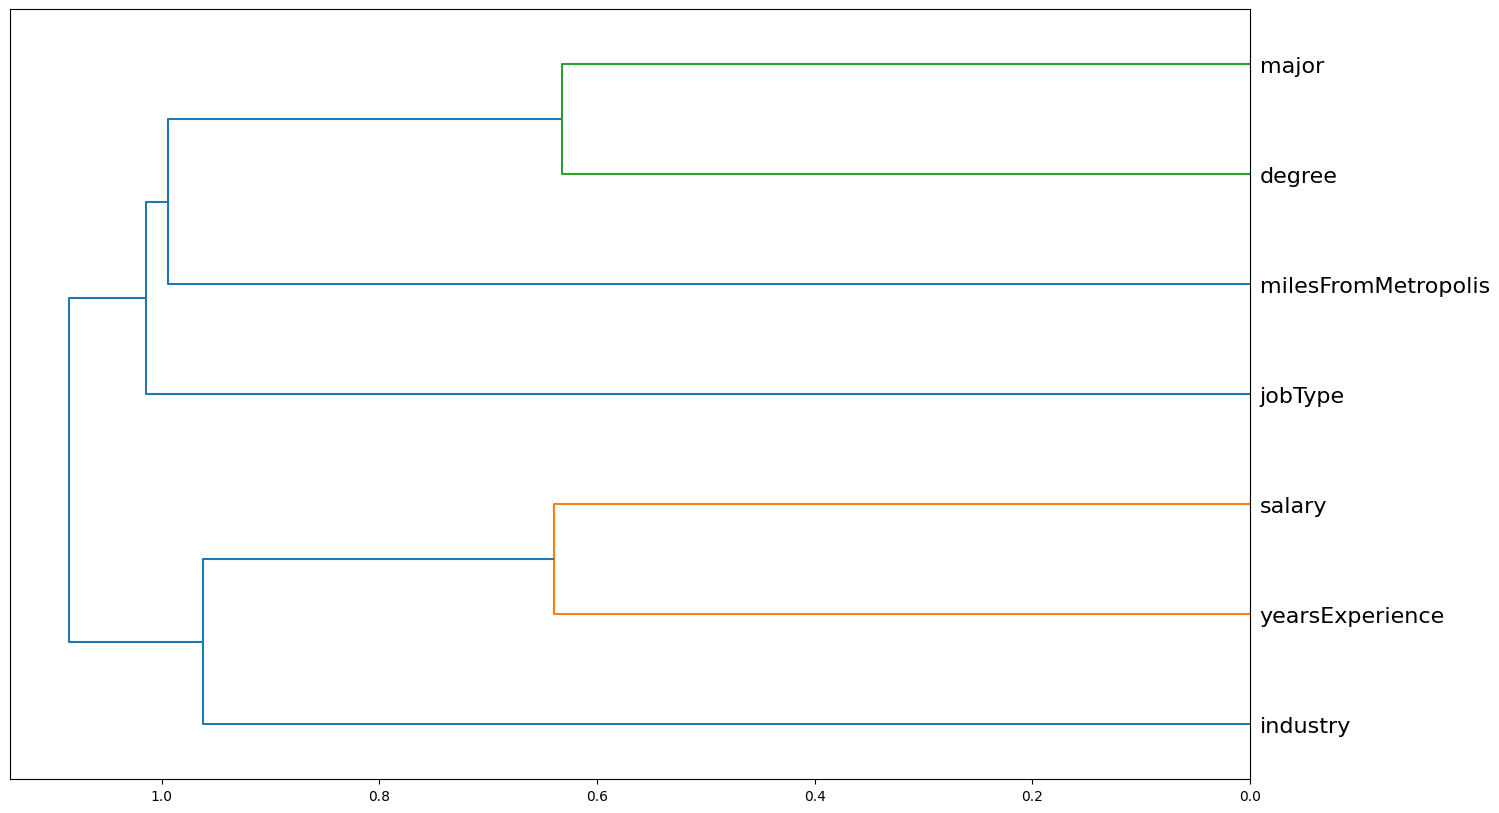

In [59]:
# A dendogram plot on the columns of the dataset (using only 50,000 out of about 1,000,000)
X = df[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

**Observation from dendogram:**
Strongly correlated variables:
1. major and degree
2. salary and yearExperience
    
Since there are no missing values and all the data are distributed equally.
We can convert the categorical values to numerical.

# **3. Data Preparation and Splitting**
### 3.1 data encoding - label encoding()

In [60]:
df.columns

Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')

In [61]:
df.dtypes

jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [62]:
dfle = df.copy()
df_test_encoded = df_test.copy()

# Initialize LabelEncoder
le = preprocessing.LabelEncoder()


In [63]:
# Apply label encoding to each categorical column
for column in categorical_columns:
    # Fit and transform the column using LabelEncoder
    dfle[column] = le.fit_transform(dfle[column])
    
    df_test_encoded[column] = le.transform(df_test_encoded[column])

In [64]:
dfle.dtypes

jobType                int64
degree                 int64
major                  int64
industry               int64
yearsExperience        int64
milesFromMetropolis    int64
salary                 int64
dtype: object

In [65]:
df_test_encoded.dtypes

jobType                int64
degree                 int64
major                  int64
industry               int64
yearsExperience        int64
milesFromMetropolis    int64
dtype: object

### 3.2 Splitting the Data

In [66]:
xl = dfle.drop('salary', axis=1)
yl = dfle['salary']

xl_train, xl_val, yl_train, yl_val = train_test_split(xl, yl, test_size=0.25, random_state=40)

In [67]:
print("shape of X_train: ",xl_train.shape)
print("shape of Y_train: ",yl_train.shape)
print("shape of X_test: ",xl_val.shape)
print("shape of Y_test: ",yl_val.shape)

shape of X_train:  (748161, 6)
shape of Y_train:  (748161,)
shape of X_test:  (249387, 6)
shape of Y_test:  (249387,)


### 3.3 Scaling the Data

In [68]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(xl_train)

StandardScaler()

In [69]:
# Transform the training data
xls_train = scaler.transform(xl_train)

# Transform the testing data using the same scaler
xls_val = scaler.transform(xl_val)

# **4. Model Training and Evaluating**

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
def get_metrics(y_true, predictions):
  mae = mean_absolute_error(y_true, predictions)
  mse = mean_squared_error(y_true, predictions)
  rmse = mean_squared_error(y_true, predictions)**0.5
  r2 = r2_score(y_true, predictions)

  print("="*50)
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"r2 Score: {r2}")
  print("="*50)

  # Return a dictionary containing the evaluation metrics.
  return {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# 4.1 Linear Regression model

Downsampling or Subsampling:  
- Consider using a smaller subset of your data for initial development and testing.
- This can help you iterate on your code more quickly without facing memory constraints.

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
"""

def lrm_train_test(scaled_X_train, y_train,scaled_X_test, y_test):
    lrm = LinearRegression()
    lrm.fit(scaled_X_train, y_train)
    lrm_preds = lrm.predict(scaled_X_test)
    lrm_metrics = get_metrics(y_test, lrm_preds)
    return (lrm, lrm_metrics)
    
"""

'\n\ndef lrm_train_test(scaled_X_train, y_train,scaled_X_test, y_test):\n    lrm = LinearRegression()\n    lrm.fit(scaled_X_train, y_train)\n    lrm_preds = lrm.predict(scaled_X_test)\n    lrm_metrics = get_metrics(y_test, lrm_preds)\n    return (lrm, lrm_metrics)\n    \n'

In [74]:
"""

lrm1, lrm1_metrics = lrm_train_test(xls_train, yl_train,xls_val, yl_val)

coefs_array = lrm1.coef_     # Get the coefficients of the model as a NumPy array
# Get the feature names
features = ['jobType','degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']

# Map the coefficients to the features using the zip() function
coefs_dict = dict(zip(features, coefs_array))

# Sort the coefficients dictionary in descending order by value
coefs_sorted = sorted(coefs_dict.items(), key=lambda x: x[1], reverse=True)

# Create a Pandas DataFrame from the coefficients dictionary
coefs_df = pd.DataFrame(coefs_sorted, columns=['Feature', 'Coefficient'])

# Print the DataFrame
print(coefs_df.to_string())

"""

"\n\nlrm1, lrm1_metrics = lrm_train_test(xls_train, yl_train,xls_val, yl_val)\n\ncoefs_array = lrm1.coef_     # Get the coefficients of the model as a NumPy array\n# Get the feature names\nfeatures = ['jobType','degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']\n\n# Map the coefficients to the features using the zip() function\ncoefs_dict = dict(zip(features, coefs_array))\n\n# Sort the coefficients dictionary in descending order by value\ncoefs_sorted = sorted(coefs_dict.items(), key=lambda x: x[1], reverse=True)\n\n# Create a Pandas DataFrame from the coefficients dictionary\ncoefs_df = pd.DataFrame(coefs_sorted, columns=['Feature', 'Coefficient'])\n\n# Print the DataFrame\nprint(coefs_df.to_string())\n\n"

In [75]:
# after running the above code the following results were achieved

lrm1_metrics = {}
# Enter the MAE value.
lrm1_metrics["mae"] = 24.587690899089033
# Enter the MSE value.
lrm1_metrics["mse"] = 926.1592443283631
# Enter the RMSE value.
lrm1_metrics["rmse"] = 30.432864543587794
# Enter the r2 score.
lrm1_metrics["r2"] = 0.37729999660875935

**features coefficients:**    

| num | Feature              | Coefficient    |
|-----|----------------------|----------------|
| 0   | yearsExperience      | 14.347388      |
| 1   | industry             | 3.325835       |
| 2   | degree               | -6.148544      |
| 3   | major                | -8.010713      |
| 4   | jobType              | -9.196977      |
| 5   | milesFromMetropolis  | -11.421223     |

# 4.2 Decision Trees

In [76]:
from sklearn import tree
dt = tree.DecisionTreeRegressor(random_state=20)
dt.fit(xls_train, yl_train)

DecisionTreeRegressor(random_state=20)

In [77]:
dt_preds = dt.predict(xls_val)
print("Metrics for test data predictions")
dt_val_metrics = get_metrics(yl_val, dt_preds)

Metrics for test data predictions
MAE: 20.48252929039147
MSE: 697.8369856716909
RMSE: 26.41660435543696
r2 Score: 0.5308116870771838


In [78]:
# Get feature importance
feature_importance = dt.feature_importances_

# Display feature importance scores
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

jobType: 0.3775782777229834
degree: 0.03244225375643195
major: 0.0882812452878387
industry: 0.09341782294328141
yearsExperience: 0.197501327223978
milesFromMetropolis: 0.21077907306548654


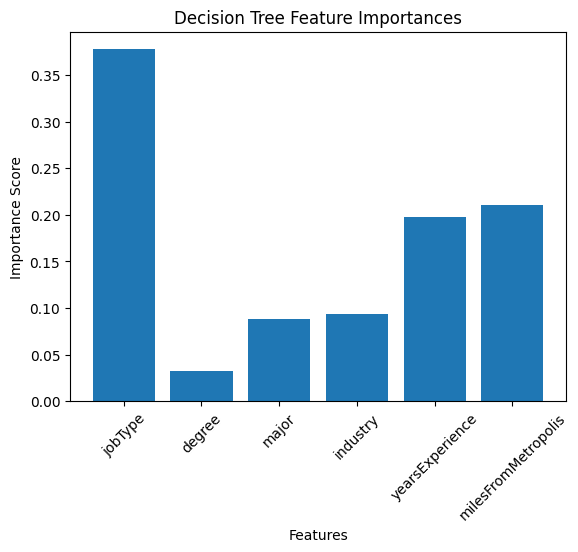

In [79]:
# Plot feature importances
plt.bar(xl.columns, feature_importance)
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.title('Decision Tree Feature Importances')
plt.show()

# 4.3 Random Forests

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
"""

rf = RandomForestRegressor(random_state=20)
rf.fit(xls_train, yl_train)
rf_preds = rf.predict(xls_val)
print("Metrics for test data predictions")
rf_test_metrics = get_metrics(yl_val, rf_preds)

# the above code takes time so I recorded the results below
"""

'\n\nrf = RandomForestRegressor(random_state=20)\nrf.fit(xls_train, yl_train)\nrf_preds = rf.predict(xls_val)\nprint("Metrics for test data predictions")\nrf_test_metrics = get_metrics(yl_val, rf_preds)\n\n# the above code takes time so I recorded the results below\n'

In [82]:
# after running the above code the following results were achieved
rf_val_metrics = {}
# Enter the MAE value.
rf_val_metrics["mae"] = 16.837545361018183
# Enter the MSE value.
rf_val_metrics["mse"] = 448.5852874965218
# Enter the RMSE value.
rf_val_metrics["rmse"] = 21.1798320932089
# Enter the r2 score.
rf_val_metrics["r2"] = 0.6983952146934368

# 4.4 XGBRegressor

In [83]:
from xgboost import XGBRegressor

In [84]:

xgb = XGBRegressor(random_state=20)
xgb.fit(xls_train, yl_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=20, ...)

In [85]:
"""
xgb_preds = xgb.predict(xls_val)
print("Metrics for test data predictions")
xgb_val_metrics = get_metrics(yl_val, xgb_preds)

# the above code takes time so I recorded the results below
"""

'\nxgb_preds = xgb.predict(xls_val)\nprint("Metrics for test data predictions")\nxgb_val_metrics = get_metrics(yl_val, xgb_preds)\n\n# the above code takes time so I recorded the results below\n'

In [86]:
# after running the above code the following results were achieved
xgb_val_metrics = {}
# Enter the MAE value.
xgb_val_metrics["mae"] = 15.415530993407884
# Enter the MSE value.
xgb_val_metrics["mse"] = 360.05424136702095
# Enter the RMSE value.
xgb_val_metrics["rmse"] = 18.975095292699347
# Enter the r2 score.
xgb_val_metrics["r2"] = 0.7579187610626668

# 4.5 Gradient Boosting Regressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
"""
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error')
gbr.fit(xls_train, yl_train)
"""

"\ngbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error')\ngbr.fit(xls_train, yl_train)\n"

In [89]:
"""
gbr_preds = gbr.predict(xls_val)
print("Metrics for test data predictions")
gbr_val_metrics = get_metrics(yl_val, gbr_preds)

# the above code takes time so I recorded the results below
"""

'\ngbr_preds = gbr.predict(xls_val)\nprint("Metrics for test data predictions")\ngbr_val_metrics = get_metrics(yl_val, gbr_preds)\n\n# the above code takes time so I recorded the results below\n'

In [90]:
# after running the above code the following results were achieved
gbr_val_metrics = {}
# Enter the MAE value.
gbr_val_metrics["mae"] = 19.95920721101937
# Enter the MSE value.
gbr_val_metrics["mse"] = 615.1520324377307
# Enter the RMSE value.
gbr_val_metrics["rmse"] = 24.802258615652942
# Enter the r2 score.
gbr_val_metrics["r2"] = 0.5864046328632293

___

# 4.6 Evaluation

In [91]:
import tabulate

from tabulate import tabulate

# Create a dictionary to store the metric values
evaluation_metrics = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Linear Regression": [lrm1_metrics["mae"], lrm1_metrics["mse"], lrm1_metrics["rmse"], lrm1_metrics["r2"]],
    "Decision Trees": [dt_val_metrics["mae"], dt_val_metrics["mse"], dt_val_metrics["rmse"], dt_val_metrics["r2"]],
    "Random Forests Regressor": [rf_val_metrics["mae"], rf_val_metrics["mse"], rf_val_metrics["rmse"], rf_val_metrics["r2"]],
    "XGBRegressor" : [xgb_val_metrics["mae"], xgb_val_metrics["mse"], xgb_val_metrics["rmse"], xgb_val_metrics["r2"]],
    "GradientBoostingRegressor" : [gbr_val_metrics["mae"], gbr_val_metrics["mse"], gbr_val_metrics["rmse"], 
                                   gbr_val_metrics["r2"]]
}

# Format the dictionary values by rounding to 2 decimal places
for key in evaluation_metrics:
    if key != "Metric":
        evaluation_metrics[key] = [round(value, 2) for value in evaluation_metrics[key]]


# Format the dictionary as a table
table = tabulate(evaluation_metrics, headers='keys', tablefmt='fancy_grid')

# table title
print("\033[1m\033[4mModel Performance Comparison\033[0m")

# Print the tabulated comparison
print(table)

Model Performance Comparison
╒══════════╤═════════════════════╤══════════════════╤════════════════════════════╤════════════════╤═════════════════════════════╕
│ Metric   │   Linear Regression │   Decision Trees │   Random Forests Regressor │   XGBRegressor │   GradientBoostingRegressor │
╞══════════╪═════════════════════╪══════════════════╪════════════════════════════╪════════════════╪═════════════════════════════╡
│ MAE      │               24.59 │            20.48 │                      16.84 │          15.42 │                       19.96 │
├──────────┼─────────────────────┼──────────────────┼────────────────────────────┼────────────────┼─────────────────────────────┤
│ MSE      │              926.16 │           697.84 │                     448.59 │         360.05 │                      615.15 │
├──────────┼─────────────────────┼──────────────────┼────────────────────────────┼────────────────┼─────────────────────────────┤
│ RMSE     │               30.43 │            26.42 │        

___

# **5. Conclusion**

- The models, in general, show a progressive improvement from Linear Regression to more complex models like XGBRegressor and Random Forests Regressor.
- XGBRegressor demonstrates the best overall performance with the lowest MAE, MSE, RMSE, and the highest R2 score among all models.
- Random Forests Regressor also performs well, showing its effectiveness in handling non-linear relationships in the dataset.
- XGBRegressor is recommended for predicting employee salaries in this scenario due to its superior performance across all evaluation metrics.

In [92]:
## To predict for the given test_dataset - df_test_encoded

salary_predictions = xgb.predict(df_test_encoded)

In [93]:
salary_predictions = pd.Series(salary_predictions)
# Combine the two dataframes
df_output = pd.concat([df_test_encoded, salary_predictions.rename('salary_prediction')], axis=1)

# Print the output dataframe
df_output.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary_prediction
0,5,2,7,3,22,73,120.105591
1,4,4,7,0,20,47,112.097939
2,2,3,0,3,17,9,109.206100
3,5,2,7,4,14,96,120.105591
4,4,1,0,4,10,44,109.206100


**Salary predictions were made using XGBRegressor model with an MAE of 15.42, an MSE of 360.05, an RMSE of 18.98, and an R² of 0.7579.**

___

# **Future Steps:**

**Hyperparameter Tuning:**
- Perform a thorough hyperparameter tuning for the best-performing models (XGBRegressor, Random Forests Regressor) to further improve their predictive performance.
- Utilize techniques like grid search or randomized search to efficiently explore the hyperparameter space.

**Ensemble Methods:**
- Experiment with ensemble methods, such as stacking, to combine the strengths of different models and potentially achieve better predictive accuracy.

**Cross-Validation:**
- Implement robust cross-validation strategies to ensure the model's generalizability and reduce the risk of overfitting. Consider techniques like k-fold cross-validation.

**Model Interpretability:**
- Explore methods for interpreting model predictions, especially if model interpretability is crucial in your application. Techniques like SHAP (SHapley Additive exPlanations) can help explain individual predictions.

**Data Quality and Cleaning:**
- Revisit the data cleaning process to address any outliers or missing values that may impact model performance. Ensure that the dataset is representative of the target population.

**External Data Sources:**
- Investigate the possibility of incorporating relevant external data sources to enrich the dataset and potentially improve the model's predictive power.

**Continuous Monitoring and Updating:**
- Implement a system for continuous model monitoring and updates as new data becomes available. This ensures that the model remains effective and accurate over time.

**User Feedback Integration:**
- If applicable, gather feedback from end-users or stakeholders to understand the practical aspects of model predictions. Use this feedback to iteratively improve the model.

**Deployment Strategy:**
- Develop a robust deployment strategy for integrating the model into the production environment. Consider factors such as scalability, real-time processing, and model versioning.

____